<a href="https://colab.research.google.com/github/yadavrahyl2k15/mnist_classifier/blob/main/fashion_mnsit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fashion_mnist=tf.keras.datasets.fashion_mnist

In [ ]:
(x_train_full,y_train_full),(x_test,y_test)=fashion_mnist.load_data()

In [ ]:
print(x_train_full.shape,y_train_full.shape)

(60000, 28, 28) (60000,)


In [ ]:
x_train_full.dtype

dtype('uint8')

In [ ]:
x_valid,x_train=x_train_full[:5000]/255.,x_train_full[5000:]/255.

In [ ]:
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]

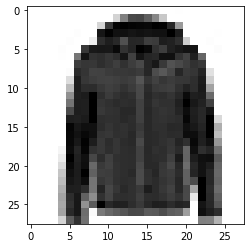

In [ ]:
plt.imshow(x_train[0],cmap="binary")

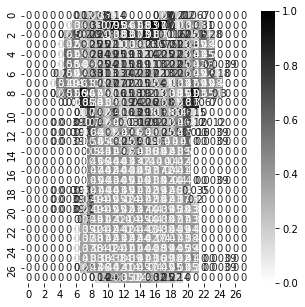

In [ ]:
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(x_train[1],annot=True,cmap="binary")

In [ ]:
LAYERS=[
        tf.keras.layers.Flatten(input_shape=(28,28),name="input_layer"),
        tf.keras.layers.Dense(400,activation="relu",name="hidden_layer1"),
        tf.keras.layers.Dense(200,activation="relu",name="hidden_layer2"),
        tf.keras.layers.Dense(100,activation="relu",name="hidden_layer3"),
        tf.keras.layers.Dense(10,activation="softmax",name="output_layer")
]

In [ ]:
model=tf.keras.models.Sequential(LAYERS)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Flatten)        (None, 784)               0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 400)               314000    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 200)               80200     
_________________________________________________________________
hidden_layer3 (Dense)        (None, 100)               20100     
_________________________________________________________________
output_layer (Dense)         (None, 10)                1010      
Total params: 415,310
Trainable params: 415,310
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loss="sparse_categorical_crossentropy"
optimizer="SGD"
metrics="accuracy"

In [ ]:
model.compile(loss=loss,optimizer=optimizer,metrics=metrics)

In [ ]:
epochs=20
validation_set=(x_valid,y_valid)

In [ ]:
history=model.fit(x_train,y_train,epochs=epochs,validation_data=validation_set)

Epoch 1/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7003 - accuracy: 0.7657 - val_loss: 0.5997 - val_accuracy: 0.7684
Epoch 2/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4704 - accuracy: 0.8333 - val_loss: 0.4166 - val_accuracy: 0.8572
Epoch 3/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4209 - accuracy: 0.8520 - val_loss: 0.4343 - val_accuracy: 0.8466
Epoch 4/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3915 - accuracy: 0.8606 - val_loss: 0.3761 - val_accuracy: 0.8690
Epoch 5/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3698 - accuracy: 0.8674 - val_loss: 0.3567 - val_accuracy: 0.8772
Epoch 6/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3514 - accuracy: 0.8735 - val_loss: 0.3968 - val_accuracy: 0.8584
Epoch 7/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3374 - accuracy: 0.8785 - val_loss: 0.3416 - val_accuracy:

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.700331,0.765673,0.599709,0.7684
1,0.470359,0.833291,0.416619,0.8572
2,0.420916,0.852036,0.434270,0.8466
3,0.391465,0.860618,0.376073,0.8690
4,0.369787,0.867436,0.356691,0.8772
5,0.351431,0.873509,0.396787,0.8584
6,0.337416,0.878509,0.341569,0.8778
7,0.324524,0.882509,0.383081,0.8622
8,0.314254,0.886691,0.318434,0.8844
9,0.304276,0.889036,0.314639,0.8864


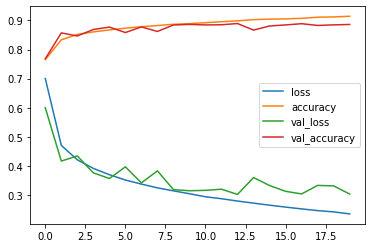

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
x_test=x_test/255.
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3339 - accuracy: 0.8814


[0.3338813781738281, 0.8813999891281128]

In [ ]:
x_new=x_test[:5]
y_prob=model.predict(x_new)
y_prob.round()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [ ]:
y_pred=np.argmax(y_prob,axis=-1)
y_pred

array([9, 2, 1, 1, 6])

In [ ]:
y_test_new=y_test[:5]
y_test_new

array([9, 2, 1, 1, 6], dtype=uint8)

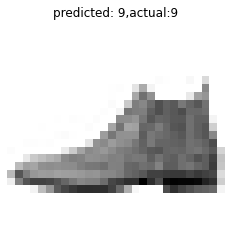

############################


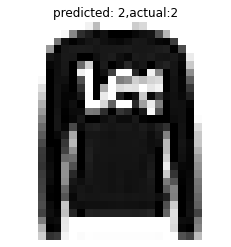

############################


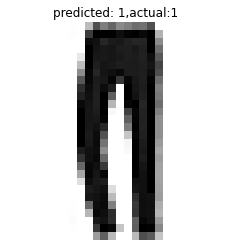

############################


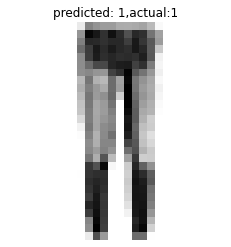

############################


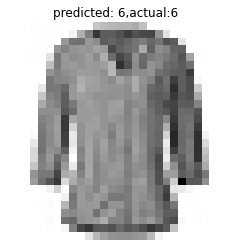

############################


In [ ]:
for data,pred,actual in zip(x_new,y_pred,y_test_new):
  plt.imshow(data,cmap="binary")
  plt.title(f"predicted: {pred},actual:{actual}")
  plt.axis("off")
  plt.show()
  print("############################")